In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from pyDOE import lhs
from sklearn.metrics import r2_score
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

In [2]:
# Define parameter ranges
num_samples = 1000
VDD_range = [1.5, 2.5]        # VDD: 1.5V to 2.5V
Wn_range = [0.18e-6, 5e-6]     # W/L: 0.18µm to 5µm
CL_range = [2e-14, 1e-12]     # C_L: 20fF to 1pF

In [9]:
x=input_data(num_samples=num_samples,VDD_range=VDD_range,Wn_range=Wn_range,CL_range=CL_range,save_file=False)

In [12]:
y=delay_data(num_samples=num_samples)

In [14]:
df=power_data(num_samples=num_samples)
y['Power']=df['Power']
y.to_csv('Output_data_Full_Adder_2000.csv')
y

,Delay,Power
0,6.433300e-10,0.000015
1,2.292070e-09,0.000016
2,5.031390e-11,0.000004
3,1.718800e-09,0.000008
4,2.354420e-09,0.000007
...,...,...
995,4.942610e-10,0.000007
996,1.249500e-08,0.000009
997,7.109580e-10,0.000020
998,1.858270e-09,0.000014


In [7]:
x=pd.read_csv('../data/Input_data_Full_Adder.csv',index_col=0)
y=pd.read_csv('../data/Output_data_Full_Adder.csv',index_col=0)

In [ ]:
y = y[x['C_L'] > 0.2e-12]
y = y.reset_index(drop=True)
x=x[x['C_L']>0.2e-12]
x = x.reset_index(drop=True)

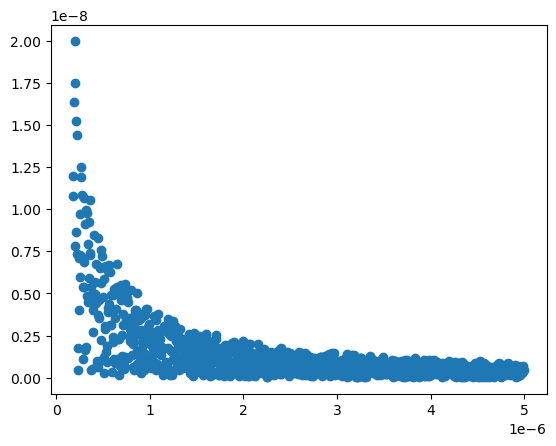

In [13]:
plt.scatter(x['W_n'],y['Delay'])

In [14]:
model=Model()
model.train(np.array(x),np.array(y))

Epoch 1/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0254 - mae: 0.1104 - val_loss: 0.0023 - val_mae: 0.0326
Epoch 2/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021 - mae: 0.0286 - val_loss: 0.0010 - val_mae: 0.0180
Epoch 3/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0014 - mae: 0.0216 - val_loss: 9.4731e-04 - val_mae: 0.0194
Epoch 4/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0010 - mae: 0.0170 - val_loss: 4.0621e-04 - val_mae: 0.0120
Epoch 5/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8884e-04 - mae: 0.0112 - val_loss: 2.9533e-04 - val_mae: 0.0089
Epoch 6/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.4606e-04 - mae: 0.0121 - val_loss: 3.0214e-04 - val_mae: 0.0115
Epoch 7/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.1353e-04 - mae: 0.0129 - val_loss: 1.9224e-04 - val_mae: 0.0092
Epoch 8/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.2359e-04 - mae: 0.0117 - val_loss: 1.7844e-04 - val_mae: 0.0083
Epoch 9/500
40/

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3.6435e-05 - mae: 0.0041 - val_loss: 7.9998e-05 - val_mae: 0.0073
Epoch 53/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.9720e-05 - mae: 0.0066 - val_loss: 8.1534e-05 - val_mae: 0.0045
Epoch 54/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.9415e-05 - mae: 0.0065 - val_loss: 4.8923e-05 - val_mae: 0.0057
Epoch 55/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.6977e-05 - mae: 0.0043 - val_loss: 6.9442e-05 - val_mae: 0.0043
Epoch 56/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.4334e-05 - mae: 0.0049 - val_loss: 5.3784e-05 - val_mae: 0.0035
Epoch 57/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.1415e-05 - mae: 0.0035 - val_loss: 3.2339e-05 - val_mae: 0.0032
Epoch 58/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.1319e-05 - mae: 0.0030 - val_loss: 1.9398e-05 - val_mae: 0.0034
Epoch 59/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.4017e-05 - mae: 0.0037 - val_loss: 3.1184e-05 - val_mae: 0.00

In [15]:
model.evaluate()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
Test Loss: 5.2906172641087323e-05, Test MAE: 0.0040253521874547005
Relative Percentage Error: 9.41020657578333
R-squared (multi-output): 0.9961169190551383
R-squared for Power: 0.9928126076564139
R-squared for Delay: 0.9994212304538628


In [39]:
VDD=1.8
W_n=1e-6
C_L=0.2e-12
print(f'VDD={VDD}V, W_n={W_n*1e6} um, C_L={C_L*1e-12}pF')
prediction=model.predict([[VDD,W_n,C_L]])
delay,power=prediction[0]
print(f'Predicted Power={power*1e6} uW, Predicted Delay={delay*1e9} ns')

VDD=1.8V, W_n=1.0 um, C_L=2e-25pF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted Power=2.963453653137549 uW, Predicted Delay=0.882785622380311 ns


In [16]:
x_test,y_test=model.get_test_data()
y_test

array([[3.75517e-09, 9.84510e-06],
       [1.81257e-09, 1.21860e-05],
       [7.47094e-10, 9.72997e-06],
       [5.20256e-09, 8.12041e-06],
       [4.80879e-09, 4.58724e-06],
       [1.51604e-09, 1.22044e-05],
       [8.75517e-10, 1.66141e-05],
       [6.60539e-10, 6.18772e-06],
       [2.01662e-10, 6.98386e-06],
       [6.46053e-10, 9.36330e-06],
       [1.30838e-09, 1.24167e-05],
       [1.06586e-09, 9.25300e-06],
       [4.83185e-09, 8.90680e-06],
       [3.58565e-10, 7.66602e-06],
       [5.31495e-10, 2.14616e-05],
       [3.94486e-10, 1.54762e-05],
       [2.99269e-09, 9.84965e-06],
       [1.19894e-08, 8.61784e-06],
       [1.19710e-09, 1.64296e-05],
       [1.63522e-08, 8.70518e-06],
       [2.25951e-10, 1.05044e-05],
       [1.24600e-09, 6.87639e-06],
       [3.91964e-09, 1.01781e-05],
       [1.52729e-10, 4.46559e-06],
       [3.44465e-09, 7.23612e-06],
       [1.45096e-10, 6.09530e-06],
       [1.15264e-10, 1.07841e-05],
       [2.53577e-11, 5.82613e-06],
       [2.32605e-10,

In [17]:
y_test_prediction=model.predict(x_test)
y_test_prediction

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[ 3.71836273e-09,  9.93737194e-06],
       [ 1.79085313e-09,  1.22497422e-05],
       [ 6.67989997e-10,  9.77376749e-06],
       [ 5.24849186e-09,  8.28512384e-06],
       [ 4.91132202e-09,  4.61563377e-06],
       [ 1.43802337e-09,  1.21611365e-05],
       [ 7.48236417e-10,  1.67541148e-05],
       [ 5.94554073e-10,  6.12758504e-06],
       [ 8.67512104e-11,  7.02256511e-06],
       [ 5.74864378e-10,  9.33317096e-06],
       [ 1.24509159e-09,  1.24641183e-05],
       [ 1.00165443e-09,  9.21943138e-06],
       [ 4.75955853e-09,  9.02224383e-06],
       [ 2.57571020e-10,  7.42612156e-06],
       [ 3.83022586e-10,  2.15788205e-05],
       [ 2.89506696e-10,  1.56627157e-05],
       [ 3.00453729e-09,  9.89948239e-06],
       [ 1.06939950e-08,  8.70583244e-06],
       [ 1.10802056e-09,  1.65321744e-05],
       [ 1.47339652e-08,  8.70022541e-06],
       [ 9.47273857e-11,  1.04662931e-05],
       [ 1.24715482e-09,  6.78697415e-06],
       [ 3.80703868e-09,  1.02364866e-05],
       [ 9.

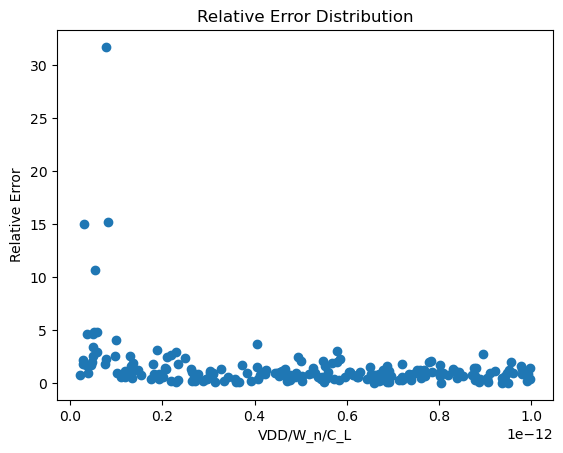

In [30]:
relative_errors = 100*np.abs((y_test - y_test_prediction) / y_test)

plt.scatter(x_test[:,2], relative_errors[:,1])
plt.xlabel("VDD/W_n/C_L")
plt.ylabel("Relative Error")
plt.title("Relative Error Distribution")
plt.show()

In [29]:
bounds = [(1.5, 2.5),  # VDD bounds
          (0.2e-6, 5e-6),  # W_n bounds
          (1e-13, 1e-12)]  # C_L bounds

# Perform optimization
result = differential_evolution( objective_function,  bounds=bounds,strategy='best1bin', maxiter=250, popsize=5 )

# Extract optimal values
optimal_VDD, optimal_W_n, optimal_C_L = result.x
print(f"Optimal VDD: {optimal_VDD}, Optimal W_n: {optimal_W_n}, Optimal C_L: {optimal_C_L}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


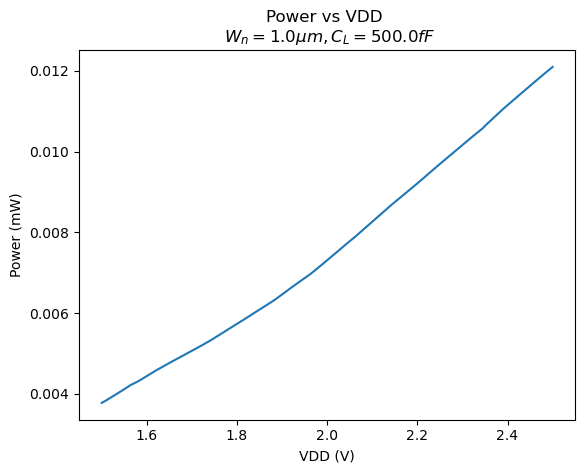

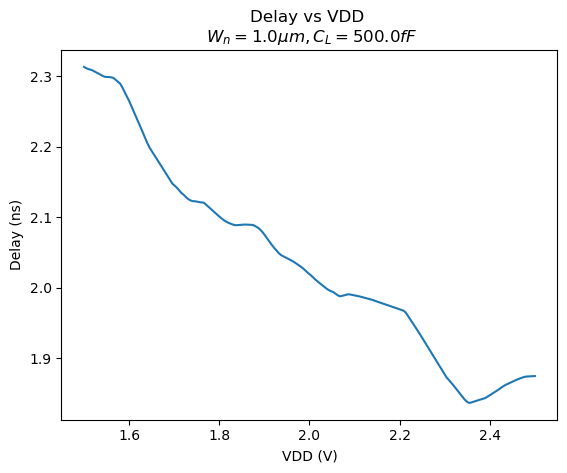

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 


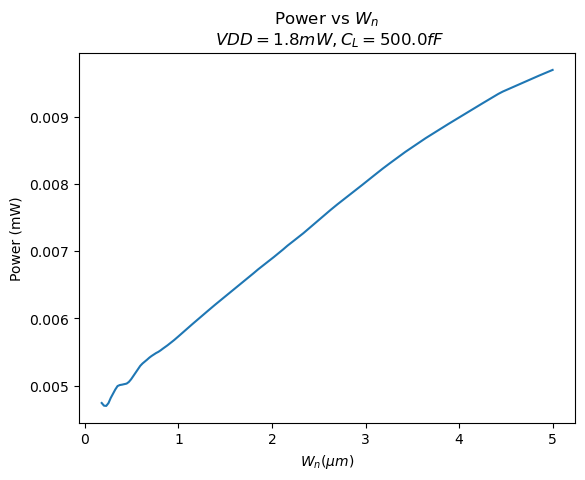

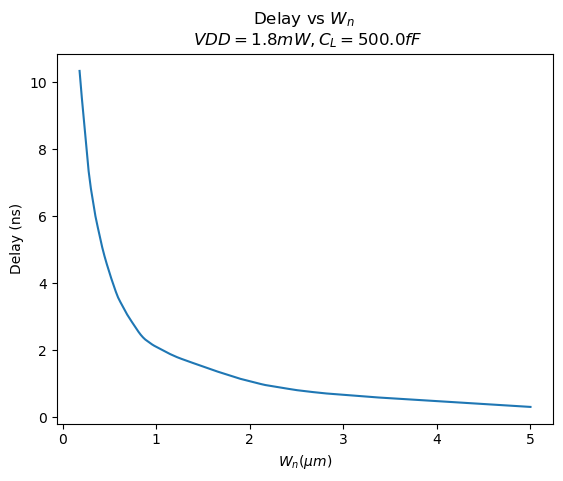

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 


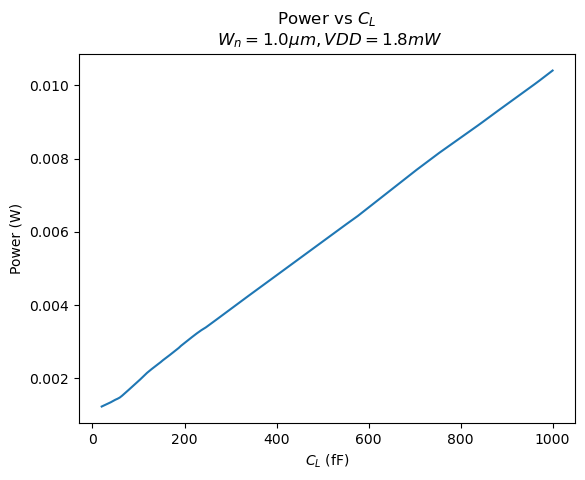

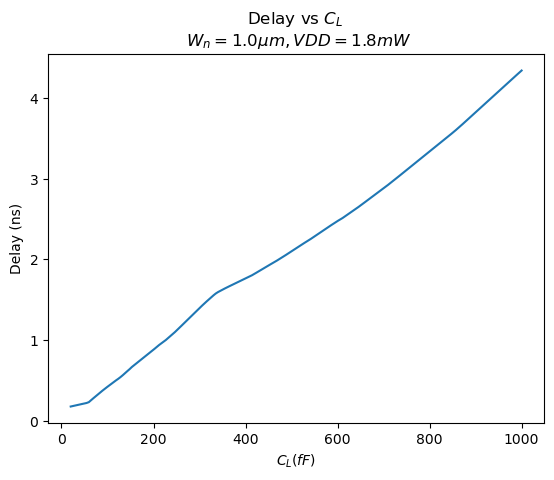

In [117]:
num_samples = 1000
VDD_range = [1.5, 2.5]        # VDD: 1.5V to 2.5V
Wn_range = [0.18e-6, 5e-6]     # W/L: 0.18µm to 5µm
CL_range = [2e-14, 1e-12]     # C_L: 20fF to 1pF

VDD=1.8
W_n=1e-6
C_L=0.5e-12

plot_VDD(VDD_range=VDD_range,W_n=W_n,C_L=C_L)
plot_W_n(Wn_range=Wn_range,VDD=VDD,C_L=C_L)
plot_C_L(CL_range=CL_range,VDD=VDD,W_n=W_n)

In [116]:
# Varying VDD
def plot_VDD(VDD_range=VDD_range,W_n=1e-6,C_L=.5e-12):
    VDD=np.linspace(*VDD_range,200)
    W_n=np.array(200*[W_n])
    C_L=np.array(200*[C_L])
    inputs=pd.DataFrame({'VDD':VDD,'W_n':W_n,'C_L':C_L})
    predictions=model.predict(np.array(inputs))
    delay,power=predictions[:,0],predictions[:,1]
    
    power=power*1e3
    delay=delay*1e9
    W_n=W_n*1e6
    C_L=C_L*1e15

    # Scatter plot for power
    #plt.subplot(3,2,1)
    plt.plot(VDD, power)
    plt.xlabel('VDD (V)')
    plt.ylabel('Power (mW)')
    plt.title(f'Power vs VDD \n $W_n={W_n[0]}\mu m, C_L={C_L[0]}fF$')
    plt.savefig('../plots/Power_vs_VDD.png')
    plt.show()
    
    # Scatter plot for delay
    #plt.subplot(3,2,2)
    plt.plot(VDD, delay)
    plt.xlabel('VDD (V)')
    plt.ylabel('Delay (ns)')
    plt.title(f'Delay vs VDD \n $W_n={W_n[0]}\mu m, C_L={C_L[0]}fF$')
    plt.savefig('../plots/Delay_vs_VDD.png')
    plt.show()

In [115]:
def plot_W_n(Wn_range=Wn_range,VDD=1.8,C_L=0.5e-12):
    # Varying W_n
    W_n=np.linspace(*Wn_range,200)
    VDD=np.array(200*[VDD])
    C_L=np.array(200*[C_L])
    inputs=pd.DataFrame({'VDD':VDD,'W_n':W_n,'C_L':C_L})
    predictions=model.predict(np.array(inputs))
    delay,power=predictions[:,0],predictions[:,1]
    
    power=power*1e3
    delay=delay*1e9
    W_n=W_n*1e6
    C_L=C_L*1e15

    # Scatter plot for power
    #plt.subplot(3,2,3)
    plt.plot(W_n, power)
    plt.xlabel('$W_n (\mu m)$')
    plt.ylabel('Power (mW)')
    plt.title(f'Power vs $W_n$ \n $VDD={VDD[0]}mW, C_L={C_L[0]}fF$')
    plt.savefig('../plots/Power_vs_Wn.png')
    plt.show()

    # Scatter plot for delay
    #plt.subplot(3,2,4)
    plt.plot(W_n, delay)
    plt.xlabel('$W_n (\mu m)$')
    plt.ylabel('Delay (ns)')
    plt.title(f'Delay vs $W_n$ \n $VDD={VDD[0]}mW, C_L={C_L[0]}fF$')
    plt.savefig('../plots/Delay_vs_Wn.png')
    plt.show()

In [110]:
def plot_C_L(CL_range=CL_range,VDD=1.8,W_n=1e-6):
    # Varying C_L
    C_L=np.linspace(*CL_range,200)
    W_n=np.array(200*[W_n])
    VDD=np.array(200*[VDD])
    inputs=pd.DataFrame({'VDD':VDD,'W_n':W_n,'C_L':C_L})
    predictions=model.predict(np.array(inputs))
    delay,power=predictions[:,0],predictions[:,1]
    
    power=power*1e3
    delay=delay*1e9
    W_n=W_n*1e6
    C_L=C_L*1e15

    # Scatter plot for power
    #plt.subplot(3,2,5)
    plt.plot(C_L, power)
    plt.xlabel('$C_L$ (fF)')
    plt.ylabel('Power (W)')
    plt.title(f'Power vs $C_L$ \n $W_n={W_n[0]}\mu m, VDD={VDD[0]}mW$')
    plt.savefig('../plots/Power_vs_CL.png')
    plt.show()

    # Scatter plot for delay
    #plt.subplot(3,2,6)
    plt.plot(C_L, delay)
    plt.xlabel('$C_L (fF)$')
    plt.ylabel('Delay (ns)')
    plt.title(f'Delay vs $C_L$ \n $W_n={W_n[0]}\mu m, VDD={VDD[0]}mW$')
    plt.savefig('../plots/Delay_vs_CL.png')
    plt.show()
    #plt.tight_layout()

In [28]:
# Define the objective function
def objective_function(params):
    
    VDD, W_n, C_L = params
    prediction = model.predict([[VDD,W_n,C_L]])
    power, delay = prediction[0]
    
    return delay

In [3]:
class Model:
    def __init__(self):
        self.model_1=tf.keras.Sequential([
            tf.keras.Input(shape=[3,]),
            #tf.keras.layers.Dense(512,activation='relu'),
            tf.keras.layers.Dense(256,activation='relu'),
            tf.keras.layers.Dense(128,activation='relu'),
            tf.keras.layers.Dense(64,activation='relu'),
            tf.keras.layers.Dense(32,activation='relu'),
            tf.keras.layers.Dense(2,activation='linear')
        ])
        self.model_1.compile(optimizer='adam',loss='mse',metrics=['mae'])
        
    def get_test_data(self):
        x_test_descaled=self.scaler_x.inverse_transform(self.x_test)
        y_test_descaled=self.scaler_y.inverse_transform(self.y_test)
        return x_test_descaled,y_test_descaled
        
    def scale(self,x,y):
        self.x=x
        self.y=y
        self.scaler_x = MinMaxScaler()
        self.scaler_y = MinMaxScaler()
        x_scaled = self.scaler_x.fit_transform(x)
        y_scaled = self.scaler_y.fit_transform(y)

        x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)
        self.x_test=x_test
        self.y_test=y_test
        return (x_train, x_test, y_train, y_test)
    
    def train(self,x,y):
        x_train, x_test, y_train, y_test=self.scale(x,y)
        self.model_1.fit(x_train,y_train,epochs=500,batch_size=16,verbose=1, validation_split=0.2,callbacks=[early_stopping])
        
    def predict(self,x_input):
        x_scaled=self.scaler_x.transform(x_input)
        y_scaled=self.model_1.predict(x_scaled)
        y_output=self.scaler_y.inverse_transform(y_scaled)
        return y_output
    
    def evaluate(self):
        test_data=self.scaler_y.inverse_transform(self.y_test)
        test_predictions=self.scaler_y.inverse_transform(self.model_1.predict(self.x_test))

        test_loss, test_mae = self.model_1.evaluate(self.x_test, self.y_test, verbose=0)
        print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

        relative_error = np.mean(np.abs((test_data - test_predictions) / test_data))

        print("Relative Percentage Error:", relative_error*100)
        
        r2 = r2_score(test_data, test_predictions)
        print("R-squared (multi-output):", r2)
        
        r2_power = r2_score(test_data[:, 0], test_predictions[:, 0]) 
        r2_delay = r2_score(test_data[:, 1], test_predictions[:, 1])  

        print("R-squared for Power:", r2_power)
        print("R-squared for Delay:", r2_delay)

In [4]:
def input_data(num_samples = 1000,VDD_range = [1.5, 2.5],Wn_range = [0.1e-6, 5e-6],CL_range = [1e-14, 1e-12],save_file=False):
    #Latin Hypercube Sampling
    lhs_samples = lhs(3, samples=num_samples)
    VDD_samples = lhs_samples[:, 0] * (VDD_range[1] - VDD_range[0]) + VDD_range[0]
    Wn_samples = lhs_samples[:, 1] * (Wn_range[1] - Wn_range[0]) + Wn_range[0]
    CL_samples = lhs_samples[:, 2] * (CL_range[1] - CL_range[0]) + CL_range[0]

    # Combine into a DataFrame
    
    x = pd.DataFrame({
        'VDD': VDD_samples,
        'W_n': Wn_samples,
        'C_L': CL_samples  
    })
    
    if(save_file==True):
        x.to_csv('Input_data_full_adder.csv')
    
    with open("LTSpice/params.inc", "w") as file:
        # Write the .param for vdd
        file.write(".param vdd table(case")
        for i, value in enumerate(x['VDD'], start=1):
            file.write(f", {i},{value:.3f}")
        file.write(")\n")

        # Write the .param for W_n
        file.write(".param W_n table(case")
        for i, value in enumerate(x['W_n'], start=1):
            file.write(f", {i},{value:.3e}")
        file.write(")\n")

        # Write the .param for C_L
        file.write(".param C_L table(case")
        for i, value in enumerate(x['C_L'], start=1):
            file.write(f", {i},{value:.3e}")
        file.write(")\n")   
    return x

In [6]:
#Reading output data from LTspice error_log file

#pd.options.display.float_format = "{:.3e}".format

def power_data(num_samples=1000):
    with open("LTSpice/Full_Adder.log", "r") as file:
        for i,line in enumerate(file):
            if "avg_power" in line:
                skips_power=i

    y=pd.read_csv('LTSpice/Full_Adder.log',sep='\t',names=['step','Power','useless1','useless2'],skiprows=skips_power+2,nrows=num_samples,usecols=['Power'])
    #y.to_csv('Power_data_full_adder.csv')
    return y

In [7]:
def delay_data(num_samples=1000):
    with open("LTSpice/Full_Adder.log", "r") as file:
        for i,line in enumerate(file):
            if "t_p" in line:
                skips_delay=i

    y=pd.read_csv('LTSpice/Full_Adder.log',sep='\t',names=['step','Delay'],skiprows=skips_delay+2,nrows=num_samples,usecols=['Delay'])
    #y.to_csv('Delay_data_full_adder.csv')
    return y

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):

        if logs['loss'] < 1e-4:
            # Stop if threshold is met
            print("\nValidation Loss is lower than 0.02 so cancelling training!")
            self.model.stop_training = True
            
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    
    patience=15,  # Number of epochs with no improvement before stopping
    restore_best_weights=True )

In [ ]:
model.summary()